# Notebook for prediction result analysis with figures

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"]=300
from sklearn.metrics import roc_auc_score
from utils import reconst_pair_idx


In [17]:
data_dir=f"./results/runs/mouse_MLP_split_large_ave_cdhit09"
score_path=os.path.join(data_dir,"score_dict.pkl")
preds_path=os.path.join(data_dir,"test_pred_result.pkl")

with open(score_path,"rb") as f:
    score=pickle.load(f)
with open(preds_path,"rb") as f:
    pred_results=pickle.load(f) # [pair_idx_list,preds,out_labels,out_logits]

print(score)


{'accuracy': 0.6406938325991189, 'precision': 0.6184088806660499, 'recall': 0.7358282883874518, 'f1': 0.6720281477758231, 'confusion_matrix': array([[ 990,  825],
       [ 480, 1337]]), 'fpr_all': array([0.        , 0.        , 0.        , ..., 0.99889807, 0.99944904,
       1.        ]), 'tpr_all': array([0.00000000e+00, 5.50357733e-04, 1.10071547e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), 'roc_thresh': array([1.9483902 , 0.9483902 , 0.94709545, ..., 0.0043934 , 0.00399218,
       0.00360261], dtype=float32), 'auc_roc': 0.7040734052891955}


In [2]:
## For contrastive learning
data_dir=f"./results/runs/multi_contrastive_1e4"
score_path=os.path.join(data_dir,"score_dict.pkl")
#preds_path=os.path.join(data_dir,"test_pred_result.pkl")

with open(score_path,"rb") as f:
    score=pickle.load(f)

print(score)


{'accuracy': 0.6569667431192661, 'precision': 0.6112676056338028, 'recall': 0.8682480708773935, 'f1': 0.7174400755697249, 'confusion_matrix': array([[1545, 1932],
       [ 461, 3038]]), 'fpr_all': array([0.        , 0.        , 0.        , ..., 0.99942479, 0.9997124 ,
       1.        ]), 'tpr_all': array([0.00000000e+00, 2.85795942e-04, 5.71591883e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), 'roc_thresh': array([1.9983335 , 0.9983334 , 0.99817824, ..., 0.02044046, 0.02017269,
       0.01490551], dtype=float32), 'auc_roc': 0.7377235354560812}


In [3]:
## For contrastive learning
data_dir=f"./results/runs/multi_contrastive_each_species_test"
score_path=os.path.join(data_dir,"score_dict.pkl")
#preds_path=os.path.join(data_dir,"test_pred_result.pkl")

with open(score_path,"rb") as f:
    score=pickle.load(f)

print(score)


{'accuracy': 0.6469323394495413, 'precision': 0.6027777777777777, 'recall': 0.8682480708773935, 'f1': 0.711558730530507, 'confusion_matrix': array([[1475, 2002],
       [ 461, 3038]]), 'fpr_all': array([0.        , 0.        , 0.        , ..., 0.99942479, 0.9997124 ,
       1.        ]), 'tpr_all': array([0.00000000e+00, 2.85795942e-04, 5.71591883e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), 'roc_thresh': array([1.9983335 , 0.9983334 , 0.99817824, ..., 0.01899686, 0.01810399,
       0.01800194], dtype=float32), 'auc_roc': 0.7247736996716182}


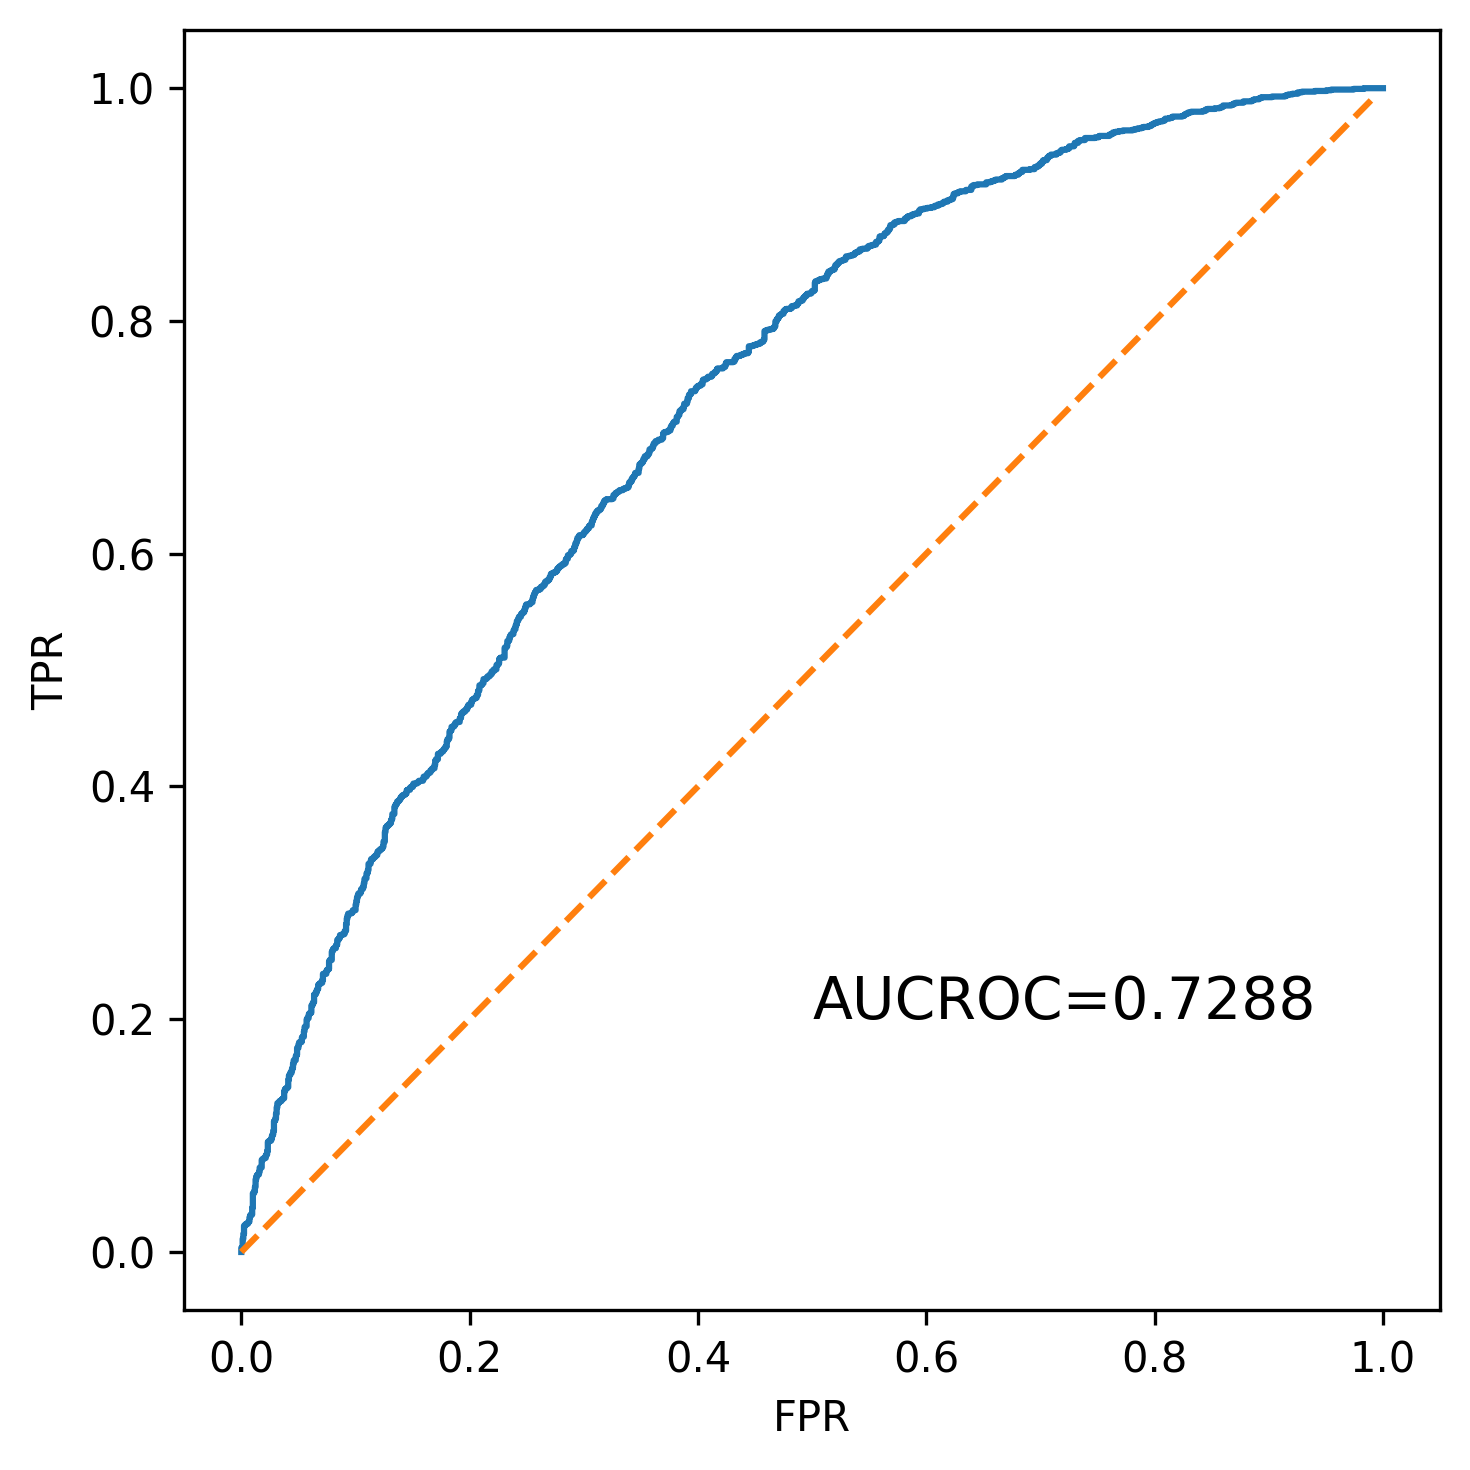

In [13]:
fig=plt.figure(figsize=(5,5))
line=np.arange(0,1,0.01)
auc_roc=score["auc_roc"]
plt.plot(score["fpr_all"],score["tpr_all"])
plt.plot(line,line,linestyle="--")
plt.text(0.5,0.2,f"AUCROC={score['auc_roc']:.4f}",fontsize=14)
#plt.title(os.path.basename(data_dir))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.tight_layout()
plt.savefig(f"./results/imgs/aucroc_{os.path.basename(data_dir)}")


## Multi result comparison

In [28]:
## Data setup
root_dir="./results/runs"
data_list=["MLP_split_large_ave_cdhit08","MLP_split_large_ave_cdhit09"]
score_dic=dict()
pred_res_dic=dict()
for d in data_list:
    data_dir=os.path.join(root_dir,d)
    score_path=os.path.join(data_dir,"score_dict.pkl")
    preds_path=os.path.join(data_dir,"test_pred_result.pkl")

    with open(score_path,"rb") as f:
        score=pickle.load(f)
    with open(preds_path,"rb") as f:
        pred_results=pickle.load(f)
    
    score_dic[d]=score
    pred_res_dic[d]=pred_results


In [ ]:
fig=plt.figure(figsize=(5,5))
line=np.arange(0,1,0.01)
for (s_k,s_v),(p_k,p_v)in zip(score_dic.items(),pred_res_dic.items()):
    auc_roc=roc_auc_score(p_v[1],p_v[2])
    plt.plot(s_v["fpr_all"],s_v["tpr_all"],label=f"{s_k}:AUCROC={auc_roc:.3f}")
    plt.plot(line,line,linestyle="--")
    #plt.text(0.5,0.2,f"AUCROC={auc_roc:.4f}",fontsize=14)
    #plt.title(os.path.basename(data_dir))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.tight_layout()
    plt.savefig(f"./results/imgs/aucroc_human_cdhit_id_comparison")


## Analysis prediction result

In [49]:
seq_df = pd.read_csv("./data/human/gencode44_utr_gene_unique_cdhit09.csv",index_col=0)
pair_idx = reconst_pair_idx(pred_results)
logits=pred_results[3].reshape(-1)


In [50]:
df_pred_res=pd.DataFrame(pair_idx,columns=["utr5","utr3","label"])
df_pred_res["pred"] = pred_results[1]
df_pred_res["correct"] = (df_pred_res["label"]==df_pred_res["pred"]).values
df_pred_res["logits"] = logits
df_pred_res["ENST_ID"]=seq_df.iloc[df_pred_res.utr5.values]["ENST_ID"].values
df_pred_res["GENE"]=seq_df.iloc[df_pred_res.utr5.values]["GENE"].values
df_pred_res=pd.concat([df_pred_res,seq_df.iloc[:,-4:].iloc[df_pred_res.utr5.values].reset_index(drop=True)],axis=1)
df_pred_res.sort_values("logits",ascending=False,inplace=True)
df_pred_res.to_csv(f"human_pred_analysis_seed{seed}.csv")
df_pred_res


,utr5,utr3,label,pred,correct,logits,ENST_ID,GENE,total_len,5UTR_len,CDS_len,3UTR_len
1615,8755,8755,1,True,True,0.938972,ENST00000374037.8,SPDEF,1910,430,1008,472
50,10941,10941,1,True,True,0.923620,ENST00000393092.7,DPEP1,1734,291,1236,207
505,975,975,1,True,True,0.905243,ENST00000525077.2,CRACR2B,2166,689,1200,277
93,12570,12570,1,True,True,0.904429,ENST00000652271.1,STING1,2295,469,1140,686
1669,11128,11128,1,True,True,0.900542,ENST00000509580.2,UNC5A,3941,232,2697,1012
...,...,...,...,...,...,...,...,...,...,...,...,...
3297,8755,3265,0,False,True,0.035532,ENST00000374037.8,SPDEF,1910,430,1008,472
3053,11516,11201,0,False,True,0.030938,ENST00000682385.1,ARHGAP32,10280,127,6306,3847
3111,13523,13628,0,False,True,0.029926,ENST00000706495.1,WNT3,3411,551,873,1987
2005,5159,9,0,False,True,0.023249,ENST00000264977.8,PPP2R3A,6743,562,3453,2728


In [53]:
topk=200
top_genes=df_pred_res[(df_pred_res["correct"]==True)&(df_pred_res["label"]==1)].iloc[:topk]["GENE"].values
meta_scape=pd.DataFrame({"Gene":top_genes,"OptionalDataColumns":np.arange(len(top_genes))})
meta_scape.to_csv(f"./results/analysis/human_top{topk}_related_genes_seed{seed}.csv",index=False)


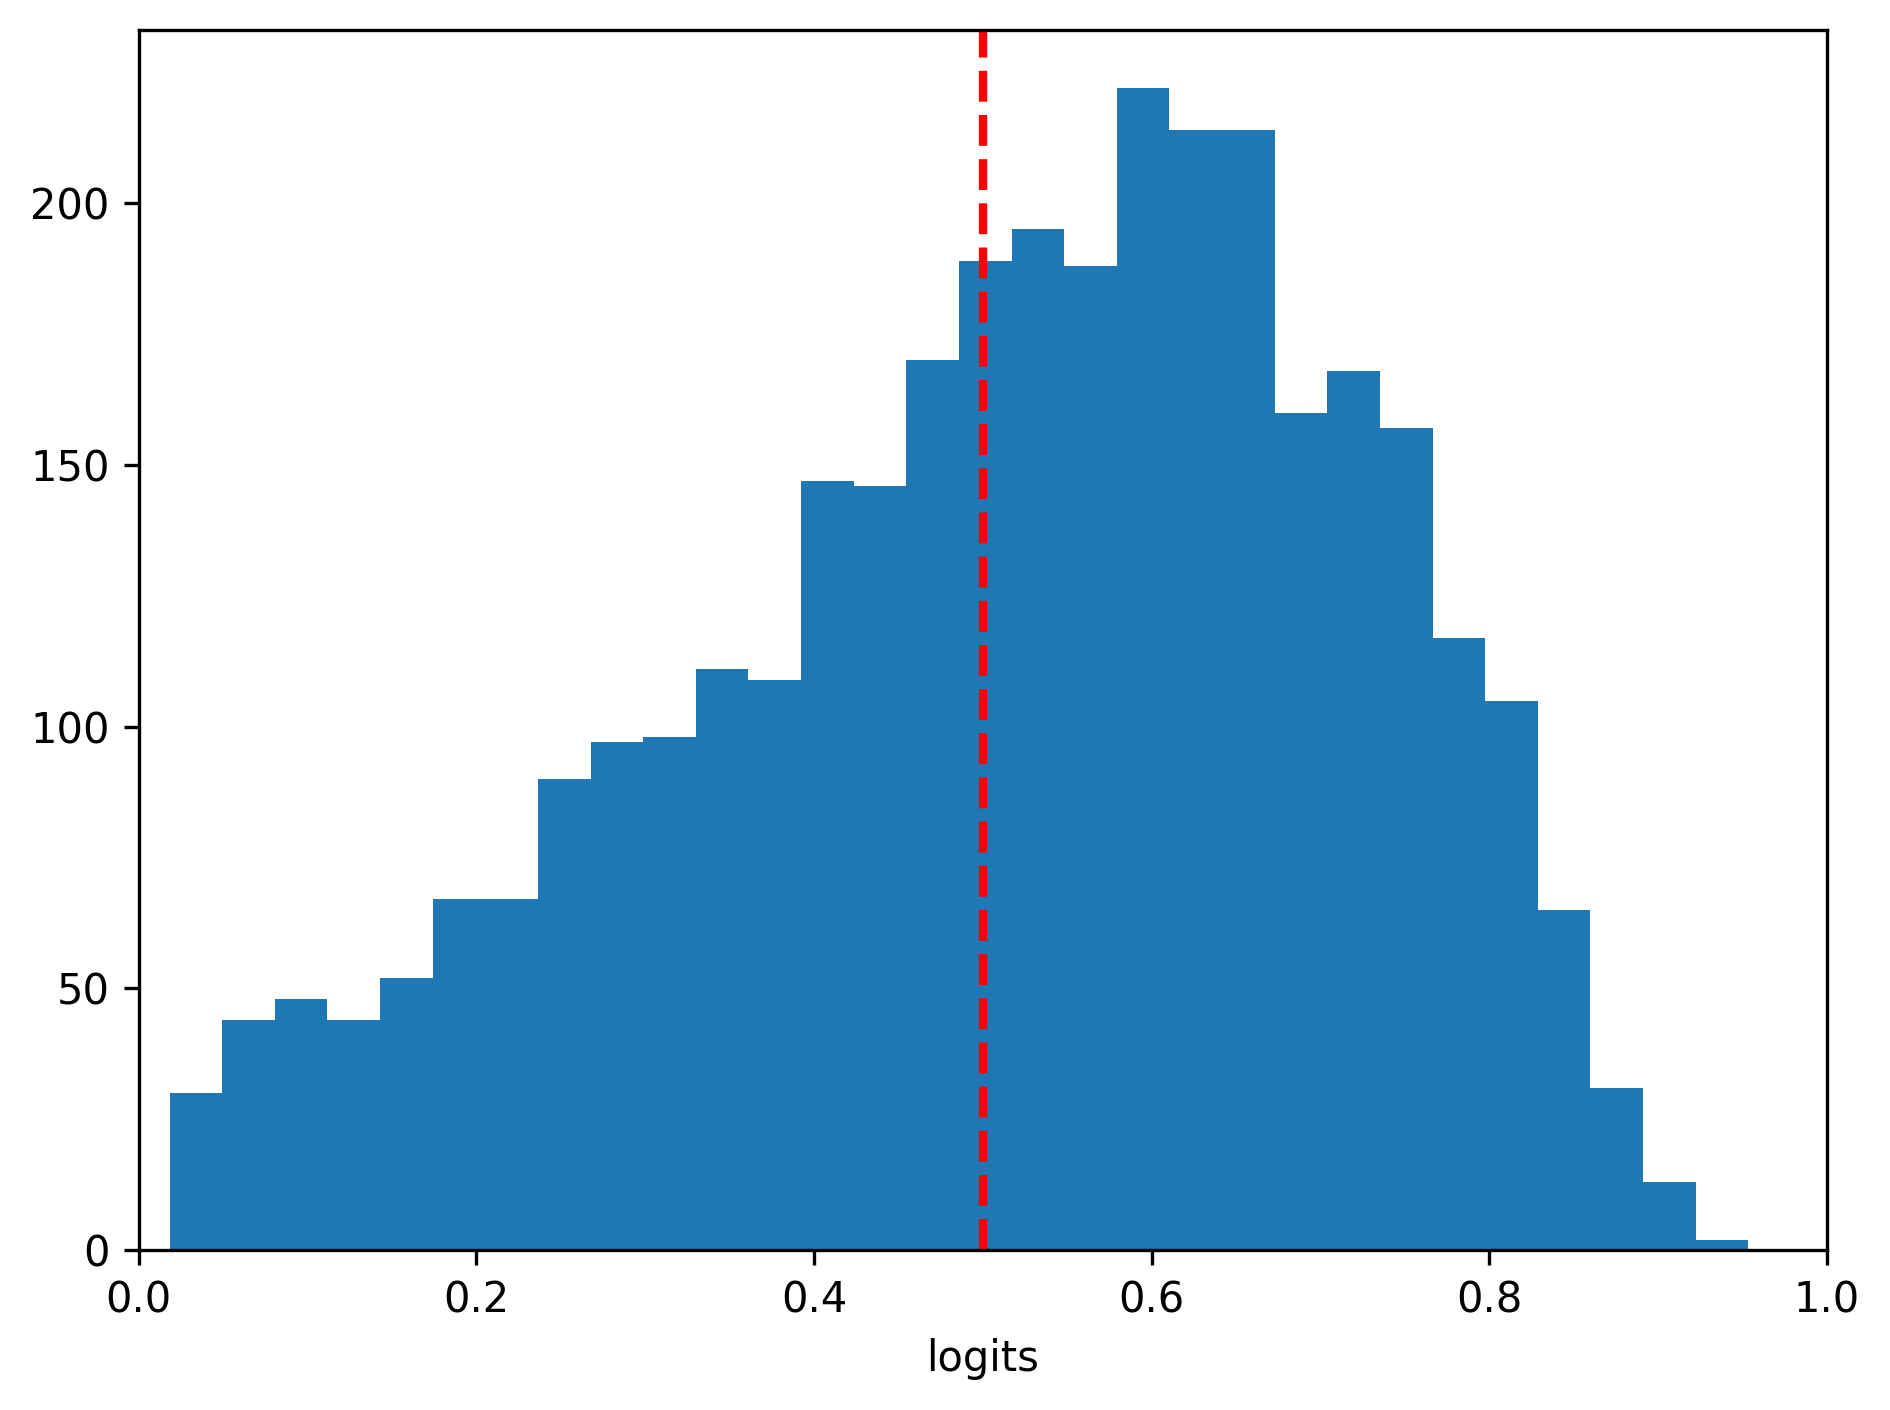

In [13]:
plt.hist(df_pred_res.logits.values,bins=30)
plt.xlim([0,1])
plt.axvline(x=0.5, color='red', linestyle='dashed', linewidth=2,)
plt.xlabel("logits")
plt.tight_layout()
#plt.savefig("./results/analysis/human_pred_logits_dist",facecolor="white")


In [58]:
gene_list=[]
for i in range(5):
    tmp_df=pd.read_csv(f"./results/analysis/human_top100_related_genes_seed{i+1}.csv")
    gene_list.extend(tmp_df["Gene"].values[:50])

df=pd.DataFrame({"Gene":gene_list,"optional":np.arange(len(gene_list))})
df.to_csv("./results/analysis/human_top_logits_5iter_allow_double.csv",index=False)
